# **Modelo Predictivo de Bitcoin**

## Importando Librerias





In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Lectura del DataFrame

In [2]:
df_original = pd.read_csv(r"C:\PythonProjects\IA-TalentoTech\Proyecto\BTCUSD_1m_Binance.csv")
df = df_original.copy()
df

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,2017-08-17 04:00:00,4261.48,4261.48,4261.48,4261.48,1.775183,2017-08-17 04:00:59.999,7.564907e+03,3.0,0.075183,320.390851,0.0
1,2017-08-17 04:01:00,4261.48,4261.48,4261.48,4261.48,0.000000,2017-08-17 04:01:59.999,0.000000e+00,0.0,0.000000,0.000000,0.0
2,2017-08-17 04:02:00,4280.56,4280.56,4280.56,4280.56,0.261074,2017-08-17 04:02:59.999,1.117543e+03,2.0,0.261074,1117.542921,0.0
3,2017-08-17 04:03:00,4261.48,4261.48,4261.48,4261.48,0.012008,2017-08-17 04:03:59.999,5.117185e+01,3.0,0.012008,51.171852,0.0
4,2017-08-17 04:04:00,4261.48,4261.48,4261.48,4261.48,0.140796,2017-08-17 04:04:59.999,5.999993e+02,1.0,0.140796,599.999338,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4134030,2025-07-03 00:22:00,108780.76,108780.76,108719.99,108758.56,12.387770,2025-07-03 00:22:59.999,1.347044e+06,2991.0,4.919940,534960.361089,0.0
4134031,2025-07-03 00:23:00,108758.55,108780.77,108715.56,108780.77,5.708540,2025-07-03 00:23:59.999,6.207653e+05,2947.0,3.189530,346832.454188,0.0
4134032,2025-07-03 00:24:00,108780.77,108848.00,108780.76,108803.75,12.433200,2025-07-03 00:24:59.999,1.352683e+06,2997.0,3.475340,378140.946278,0.0
4134033,2025-07-03 00:25:00,108803.75,108803.75,108751.43,108751.44,1.907680,2025-07-03 00:25:59.999,2.075158e+05,1692.0,0.289230,31467.136108,0.0


## Análisis exploratorio de los datos

In [3]:
#Verificando cantidad de datos nulos
df.isnull().sum()

Open time                       0
Open                            0
High                            0
Low                             0
Close                           0
Volume                          0
Close time                      0
Quote asset volume              0
Number of trades                0
Taker buy base asset volume     0
Taker buy quote asset volume    0
Ignore                          0
dtype: int64

In [4]:
#Verificando cantidad de datos duplicados
df.duplicated().sum()

0

In [5]:
# Descripcion Estadistica
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,4134035.0,3.143906e+04,2.729691e+04,2830.0,8824.020000,22903.650000,4.697804e+04,1.119241e+05
High,4134035.0,3.145422e+04,2.730663e+04,2830.0,8830.000000,22915.310000,4.700612e+04,1.119800e+05
Low,4134035.0,3.142376e+04,2.728716e+04,2817.0,8818.075000,22891.700000,4.694897e+04,1.119153e+05
Close,4134035.0,3.143907e+04,2.729694e+04,2817.0,8824.045000,22903.470000,4.697805e+04,1.119241e+05
Volume,4134035.0,4.544916e+01,8.806530e+01,0.0,9.233867,20.157690,4.522490e+01,5.877775e+03
Quote asset volume,4134035.0,1.221976e+06,2.379428e+06,0.0,148188.276311,473964.121179,1.358431e+06,2.598501e+08
Number of trades,4134035.0,1.223968e+03,2.038462e+03,0.0,203.000000,538.000000,1.319000e+03,1.497130e+05
Taker buy base asset volume,4134035.0,2.258403e+01,4.491545e+01,0.0,4.060270,9.631230,2.257431e+01,3.537453e+03
Taker buy quote asset volume,4134035.0,6.043300e+05,1.238658e+06,0.0,62793.159716,215310.778929,6.604329e+05,1.482314e+08
Ignore,4134035.0,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00


In [6]:
# Columnas del dataset
df.columns

Index(['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time',
       'Quote asset volume', 'Number of trades', 'Taker buy base asset volume',
       'Taker buy quote asset volume', 'Ignore'],
      dtype='object')

In [7]:
# Tamaño del dataset
df.shape

(4134035, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4134035 entries, 0 to 4134034
Data columns (total 12 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Open time                     object 
 1   Open                          float64
 2   High                          float64
 3   Low                           float64
 4   Close                         float64
 5   Volume                        float64
 6   Close time                    object 
 7   Quote asset volume            float64
 8   Number of trades              float64
 9   Taker buy base asset volume   float64
 10  Taker buy quote asset volume  float64
 11  Ignore                        float64
dtypes: float64(10), object(2)
memory usage: 378.5+ MB


## Limpieza de datos

Eliminación de columnas innecesarias

In [9]:
df.drop(columns=["Ignore", "Close time"], inplace=True)
df.columns

Index(['Open time', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Quote asset volume', 'Number of trades', 'Taker buy base asset volume',
       'Taker buy quote asset volume'],
      dtype='object')

### Creación y conversión de datos en nuevas columnas (date y hour)

In [10]:
# Convertir a datetime
df["Datetime"] = pd.to_datetime(df["Open time"])

# Extraer fecha y hora
df["Date"] = df["Datetime"].dt.date
df["Hour"] = df["Datetime"].dt.hour

# Convertir Date a datetime64
df["Date"] = pd.to_datetime(df["Date"])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4134035 entries, 0 to 4134034
Data columns (total 13 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   Open time                     object        
 1   Open                          float64       
 2   High                          float64       
 3   Low                           float64       
 4   Close                         float64       
 5   Volume                        float64       
 6   Quote asset volume            float64       
 7   Number of trades              float64       
 8   Taker buy base asset volume   float64       
 9   Taker buy quote asset volume  float64       
 10  Datetime                      datetime64[ns]
 11  Date                          datetime64[ns]
 12  Hour                          int32         
dtypes: datetime64[ns](2), float64(9), int32(1), object(1)
memory usage: 394.3+ MB


### Límite de registros

El dataset se está actualizando constantemente, por lo que esto es una medida de estandarización para evaluar los resultados

In [11]:
df = df[df['Date'] <= pd.Timestamp(dt.date(year=2025, month=6, day=30))]

In [12]:
df

,Open time,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Datetime,Date,Hour
0,2017-08-17 04:00:00,4261.48,4261.48,4261.48,4261.48,1.775183,7.564907e+03,3.0,0.075183,3.203909e+02,2017-08-17 04:00:00,2017-08-17,4
1,2017-08-17 04:01:00,4261.48,4261.48,4261.48,4261.48,0.000000,0.000000e+00,0.0,0.000000,0.000000e+00,2017-08-17 04:01:00,2017-08-17,4
2,2017-08-17 04:02:00,4280.56,4280.56,4280.56,4280.56,0.261074,1.117543e+03,2.0,0.261074,1.117543e+03,2017-08-17 04:02:00,2017-08-17,4
3,2017-08-17 04:03:00,4261.48,4261.48,4261.48,4261.48,0.012008,5.117185e+01,3.0,0.012008,5.117185e+01,2017-08-17 04:03:00,2017-08-17,4
4,2017-08-17 04:04:00,4261.48,4261.48,4261.48,4261.48,0.140796,5.999993e+02,1.0,0.140796,5.999993e+02,2017-08-17 04:04:00,2017-08-17,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4131123,2025-06-30 23:55:00,107104.12,107104.12,107093.34,107093.34,1.489080,1.594723e+05,370.0,1.046640,1.120883e+05,2025-06-30 23:55:00,2025-06-30,23
4131124,2025-06-30 23:56:00,107093.35,107093.35,107071.64,107071.65,1.729470,1.852058e+05,591.0,0.200040,2.142194e+04,2025-06-30 23:56:00,2025-06-30,23
4131125,2025-06-30 23:57:00,107071.64,107086.00,107071.64,107085.99,5.136420,5.500011e+05,516.0,2.935670,3.143323e+05,2025-06-30 23:57:00,2025-06-30,23
4131126,2025-06-30 23:58:00,107085.99,107140.00,107085.99,107139.99,14.187840,1.519565e+06,2001.0,13.914420,1.490284e+06,2025-06-30 23:58:00,2025-06-30,23


### Reducciendo columnas y agrupando por día y hora

In [13]:
# Agrupar por Date y Hour
df_hora = df.groupby(["Date", "Hour"])[["Open", "High", "Low", "Close"]].mean()

# Agregar columnas con suma
df_hora["Volume"] = df.groupby(["Date", "Hour"])["Volume"].sum()
df_hora["Quote asset volume"] = df.groupby(["Date", "Hour"])["Quote asset volume"].sum()
df_hora["Number of trades"] = df.groupby(["Date", "Hour"])["Number of trades"].sum()
df_hora["Taker buy base asset volume"] = df.groupby(["Date", "Hour"])["Taker buy base asset volume"].sum()
df_hora["Taker buy quote asset volume"] = df.groupby(["Date", "Hour"])["Taker buy quote asset volume"].sum()

# Resetear índice
df_hora = df_hora.reset_index()

df_hora

,Date,Hour,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume
0,2017-08-17,4,4282.443667,4283.535667,4281.556333,4282.625167,47.181009,2.023661e+05,171.0,35.160503,1.509525e+05
1,2017-08-17,5,4313.180667,4313.642500,4312.843833,4313.305667,23.234916,1.003048e+05,102.0,21.448071,9.260828e+04
2,2017-08-17,6,4326.450167,4327.375833,4326.350667,4327.276333,7.229691,3.128231e+04,36.0,4.802861,2.079532e+04
3,2017-08-17,7,4310.706833,4311.151000,4310.593833,4311.038000,4.443249,1.924106e+04,25.0,2.602292,1.129135e+04
4,2017-08-17,8,4360.839667,4361.117500,4360.097500,4360.375333,0.972807,4.239504e+03,28.0,0.814655,3.552747e+03
...,...,...,...,...,...,...,...,...,...,...,...
68863,2025-06-30,19,107458.975833,107479.450333,107446.760667,107467.366333,325.038380,3.494657e+07,71715.0,194.530860,2.091631e+07
68864,2025-06-30,20,107597.273500,107606.758000,107583.732500,107594.471000,187.168190,2.013920e+07,49798.0,81.445960,8.763359e+06
68865,2025-06-30,21,107370.565500,107380.719667,107352.140000,107363.107667,441.728720,4.737217e+07,61097.0,114.763930,1.230459e+07
68866,2025-06-30,22,107214.892500,107227.701833,107200.199833,107214.589167,203.265000,2.178984e+07,59272.0,101.822900,1.091597e+07


In [14]:
df_hora["Datetime"] = pd.to_datetime(df_hora["Date"]) + pd.to_timedelta(df_hora["Hour"], unit="h")
df_hora.set_index("Datetime", inplace=True)
df_hora

,Date,Hour,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume
Datetime,,,,,,,,,,,
2017-08-17 04:00:00,2017-08-17,4,4282.443667,4283.535667,4281.556333,4282.625167,47.181009,2.023661e+05,171.0,35.160503,1.509525e+05
2017-08-17 05:00:00,2017-08-17,5,4313.180667,4313.642500,4312.843833,4313.305667,23.234916,1.003048e+05,102.0,21.448071,9.260828e+04
2017-08-17 06:00:00,2017-08-17,6,4326.450167,4327.375833,4326.350667,4327.276333,7.229691,3.128231e+04,36.0,4.802861,2.079532e+04
2017-08-17 07:00:00,2017-08-17,7,4310.706833,4311.151000,4310.593833,4311.038000,4.443249,1.924106e+04,25.0,2.602292,1.129135e+04
2017-08-17 08:00:00,2017-08-17,8,4360.839667,4361.117500,4360.097500,4360.375333,0.972807,4.239504e+03,28.0,0.814655,3.552747e+03
...,...,...,...,...,...,...,...,...,...,...,...
2025-06-30 19:00:00,2025-06-30,19,107458.975833,107479.450333,107446.760667,107467.366333,325.038380,3.494657e+07,71715.0,194.530860,2.091631e+07
2025-06-30 20:00:00,2025-06-30,20,107597.273500,107606.758000,107583.732500,107594.471000,187.168190,2.013920e+07,49798.0,81.445960,8.763359e+06
2025-06-30 21:00:00,2025-06-30,21,107370.565500,107380.719667,107352.140000,107363.107667,441.728720,4.737217e+07,61097.0,114.763930,1.230459e+07


Horas sin volume

In [15]:
df_hora[df_hora["Volume"]==0]

,Date,Hour,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume
Datetime,,,,,,,,,,,
2017-09-06 16:00:00,2017-09-06,16,4619.43,4619.43,4619.43,4619.43,0.0,0.0,0.0,0.0,0.0
2019-06-07 21:00:00,2019-06-07,21,7930.85,7930.85,7930.85,7930.85,0.0,0.0,0.0,0.0,0.0
2021-02-11 03:00:00,2021-02-11,3,44582.07,44582.07,44582.07,44582.07,0.0,0.0,0.0,0.0,0.0
2023-03-24 12:00:00,2023-03-24,12,28080.00,28080.00,28080.00,28080.00,0.0,0.0,0.0,0.0,0.0


## Feature Engineering

### Retorno Logarítmico

In [16]:
df_hora["log_return"] = np.log(df_hora["Close"] / df_hora["Close"].shift(1))

### SMA y EMA

In [17]:
df_hora["sma_3"] = df_hora["Close"].rolling(window=3).mean()
df_hora["sma_6"] = df_hora["Close"].rolling(window=6).mean()
df_hora["ema_3"] = df_hora["Close"].ewm(span=3, adjust=False).mean()
df_hora["ema_6"] = df_hora["Close"].ewm(span=6, adjust=False).mean()

### MACD (Moving Average Convergence Divergence)

In [18]:
ema_12 = df_hora["Close"].ewm(span=12, adjust=False).mean()
ema_26 = df_hora["Close"].ewm(span=26, adjust=False).mean()
df_hora["macd"] = ema_12 - ema_26
df_hora["macd_signal"] = df_hora["macd"].ewm(span=9, adjust=False).mean()
df_hora["macd_hist"] = df_hora["macd"] - df_hora["macd_signal"]

### RSI (Relative Strength Index)

In [19]:
def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df_hora["rsi_14"] = compute_rsi(df_hora["Close"], period=14)

### Bandas de Bollinger

In [20]:
rolling_mean = df_hora["Close"].rolling(window=20).mean()
rolling_std = df_hora["Close"].rolling(window=20).std()
df_hora["bb_middle"] = rolling_mean
df_hora["bb_upper"] = rolling_mean + (2 * rolling_std)
df_hora["bb_lower"] = rolling_mean - (2 * rolling_std)

### ATR (Average True Range)

In [21]:
high_low = df_hora["High"] - df_hora["Low"]
high_close = np.abs(df_hora["High"] - df_hora["Close"].shift())
low_close = np.abs(df_hora["Low"] - df_hora["Close"].shift())
true_range = pd.concat([high_low, high_close, low_close], axis=1).max(axis=1)
df_hora["atr_14"] = true_range.rolling(window=14).mean()

### Buy Pressure (Presión Compradora)

In [22]:
df_hora["buy_pressure"] = df_hora["Taker buy base asset volume"] / df_hora["Volume"]

### Rango y Cuerpo de la Vela

In [23]:
df_hora["range"] = df_hora["High"] - df_hora["Low"]
df_hora["body"] = np.abs(df_hora["Close"] - df_hora["Open"])

### Características temporales

In [24]:
df_hora["day_of_week"] = df_hora.index.dayofweek
df_hora["month"] = df_hora.index.month

In [25]:
df_hora.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 68868 entries, 2017-08-17 04:00:00 to 2025-06-30 23:00:00
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date                          68868 non-null  datetime64[ns]
 1   Hour                          68868 non-null  int32         
 2   Open                          68868 non-null  float64       
 3   High                          68868 non-null  float64       
 4   Low                           68868 non-null  float64       
 5   Close                         68868 non-null  float64       
 6   Volume                        68868 non-null  float64       
 7   Quote asset volume            68868 non-null  float64       
 8   Number of trades              68868 non-null  float64       
 9   Taker buy base asset volume   68868 non-null  float64       
 10  Taker buy quote asset volume  68868 non-null  float64      

### Buscando y entendiendo los registros nulos

In [26]:
df_hora.isnull().sum()

Date                             0
Hour                             0
Open                             0
High                             0
Low                              0
Close                            0
Volume                           0
Quote asset volume               0
Number of trades                 0
Taker buy base asset volume      0
Taker buy quote asset volume     0
log_return                       1
sma_3                            2
sma_6                            5
ema_3                            0
ema_6                            0
macd                             0
macd_signal                      0
macd_hist                        0
rsi_14                          13
bb_middle                       19
bb_upper                        19
bb_lower                        19
atr_14                          13
buy_pressure                     4
range                            0
body                             0
day_of_week                      0
month               

In [27]:
df_hora

,Date,Hour,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Taker buy base asset volume,...,rsi_14,bb_middle,bb_upper,bb_lower,atr_14,buy_pressure,range,body,day_of_week,month
Datetime,,,,,,,,,,,,,,,,,,,,,
2017-08-17 04:00:00,2017-08-17,4,4282.443667,4283.535667,4281.556333,4282.625167,47.181009,2.023661e+05,171.0,35.160503,...,NaN,NaN,NaN,NaN,NaN,0.745226,1.979333,0.181500,3,8
2017-08-17 05:00:00,2017-08-17,5,4313.180667,4313.642500,4312.843833,4313.305667,23.234916,1.003048e+05,102.0,21.448071,...,NaN,NaN,NaN,NaN,NaN,0.923097,0.798667,0.125000,3,8
2017-08-17 06:00:00,2017-08-17,6,4326.450167,4327.375833,4326.350667,4327.276333,7.229691,3.128231e+04,36.0,4.802861,...,NaN,NaN,NaN,NaN,NaN,0.664325,1.025167,0.826167,3,8
2017-08-17 07:00:00,2017-08-17,7,4310.706833,4311.151000,4310.593833,4311.038000,4.443249,1.924106e+04,25.0,2.602292,...,NaN,NaN,NaN,NaN,NaN,0.585673,0.557167,0.331167,3,8
2017-08-17 08:00:00,2017-08-17,8,4360.839667,4361.117500,4360.097500,4360.375333,0.972807,4.239504e+03,28.0,0.814655,...,NaN,NaN,NaN,NaN,NaN,0.837427,1.020000,0.464333,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-30 19:00:00,2025-06-30,19,107458.975833,107479.450333,107446.760667,107467.366333,325.038380,3.494657e+07,71715.0,194.530860,...,34.044685,107843.365333,108798.480043,106888.250624,202.108655,0.598486,32.689667,8.390500,0,6
2025-06-30 20:00:00,2025-06-30,20,107597.273500,107606.758000,107583.732500,107594.471000,187.168190,2.013920e+07,49798.0,81.445960,...,41.337187,107794.576275,108691.252710,106897.899840,191.871560,0.435149,23.025500,2.802500,0,6
2025-06-30 21:00:00,2025-06-30,21,107370.565500,107380.719667,107352.140000,107363.107667,441.728720,4.737217e+07,61097.0,114.763930,...,43.939655,107731.365950,108556.234405,106906.497495,181.638810,0.259806,28.579667,7.457833,0,6


In [28]:
df_hora[df_hora.isnull().any(axis=1)]

,Date,Hour,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Taker buy base asset volume,...,rsi_14,bb_middle,bb_upper,bb_lower,atr_14,buy_pressure,range,body,day_of_week,month
Datetime,,,,,,,,,,,,,,,,,,,,,
2017-08-17 04:00:00,2017-08-17,4,4282.443667,4283.535667,4281.556333,4282.625167,47.181009,202366.138393,171.0,35.160503,...,NaN,NaN,NaN,NaN,NaN,0.745226,1.979333,0.181500,3,8
2017-08-17 05:00:00,2017-08-17,5,4313.180667,4313.642500,4312.843833,4313.305667,23.234916,100304.823567,102.0,21.448071,...,NaN,NaN,NaN,NaN,NaN,0.923097,0.798667,0.125000,3,8
2017-08-17 06:00:00,2017-08-17,6,4326.450167,4327.375833,4326.350667,4327.276333,7.229691,31282.312670,36.0,4.802861,...,NaN,NaN,NaN,NaN,NaN,0.664325,1.025167,0.826167,3,8
2017-08-17 07:00:00,2017-08-17,7,4310.706833,4311.151000,4310.593833,4311.038000,4.443249,19241.058300,25.0,2.602292,...,NaN,NaN,NaN,NaN,NaN,0.585673,0.557167,0.331167,3,8
2017-08-17 08:00:00,2017-08-17,8,4360.839667,4361.117500,4360.097500,4360.375333,0.972807,4239.503586,28.0,0.814655,...,NaN,NaN,NaN,NaN,NaN,0.837427,1.020000,0.464333,3,8
2017-08-17 09:00:00,2017-08-17,9,4397.934667,4398.649833,4397.844000,4398.649833,10.763623,47219.355944,43.0,10.258400,...,NaN,NaN,NaN,NaN,NaN,0.953062,0.805833,0.715167,3,8
2017-08-17 10:00:00,2017-08-17,10,4428.762833,4429.903333,4428.154833,4428.906333,24.865399,110290.728988,82.0,21.698693,...,NaN,NaN,NaN,NaN,NaN,0.872646,1.748500,0.143500,3,8
2017-08-17 11:00:00,2017-08-17,11,4467.318000,4468.402500,4466.962500,4468.385833,27.018053,120751.569232,95.0,26.015885,...,NaN,NaN,NaN,NaN,NaN,0.962907,1.440000,1.067833,3,8
2017-08-17 12:00:00,2017-08-17,12,4428.373333,4429.121333,4427.718667,4428.084333,23.032398,102126.518585,108.0,15.312994,...,NaN,NaN,NaN,NaN,NaN,0.664846,1.402667,0.289000,3,8


## Graficos para entender el Dataset

### Características temporales

c:\Users\davie\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\davie\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


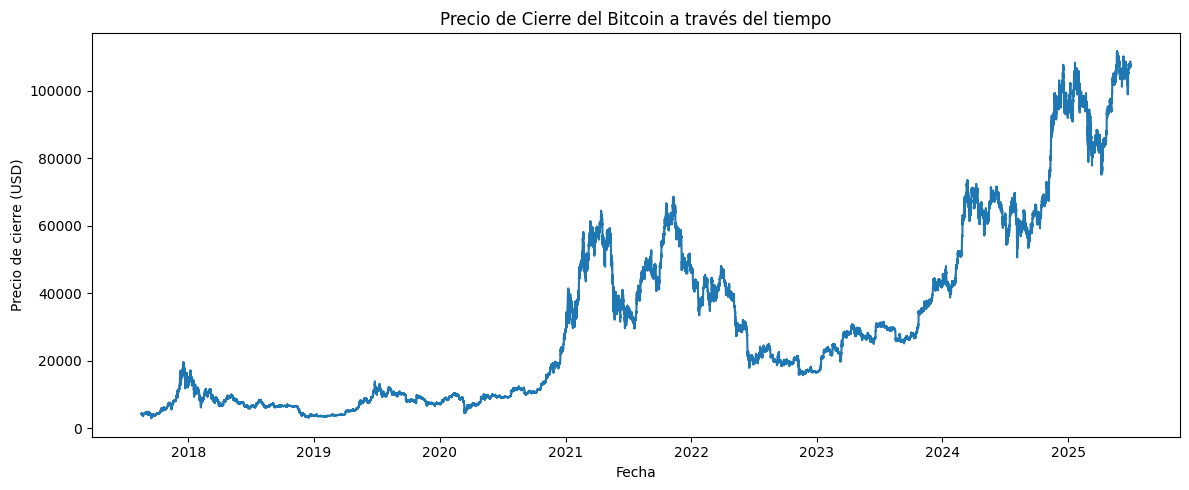

In [29]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_hora, x=df_hora.index, y="Close")

plt.title("Precio de Cierre del Bitcoin a través del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Precio de cierre (USD)")
plt.tight_layout()
plt.show()